In [1]:
from tqdm import tqdm
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.multiprocessing as mp

from s4hci.utils.data_handling import load_adi_data
from s4hci.utils.masks import construct_round_rfrr_template, construct_rfrr_mask
from s4hci.utils.s4_rigde import compute_betas_least_square, compute_betas_svd
from s4hci.utils.positions import get_validation_positions
from s4hci.models.noise import S4Noise

## Load the data

In [2]:
print("Loading data ... ", end='')
science_data, raw_angles, raw_psf_template_data = \
    load_adi_data("/fast/mbonse/s4/30_data/EpsEri_0100_C-0656-A.hdf5",
                  data_tag="13_object_final",
                  psf_template_tag="10_psf",
                  para_tag="header_13_object_final/PARANG")

psf_template_data = np.mean(raw_psf_template_data, axis=0)
print("[DONE]")

Loading data ... [DONE]


In [3]:
X_train = science_data[0::2]
X_test = science_data[1::2]
angles_train = raw_angles[0::2]
angles_test = raw_angles[1::2]

In [4]:
del science_data
del raw_angles
del raw_psf_template_data

In [5]:
import gc

In [6]:
gc.collect()

0

## Test create

In [7]:
# setup of all parameters for the S4Noise model
data_image_size = X_train.shape[-1]
psf_template = psf_template_data
lambda_reg = 2000
cut_radius_psf = 4.0
mask_template_setup = ("radius", 5.5)
convolve = True
verbose = True

In [13]:
s4_noise = S4Noise(
    data_image_size=data_image_size,
    psf_template=psf_template,
    lambda_reg=lambda_reg,
    cut_radius_psf=cut_radius_psf,
    mask_template_setup=mask_template_setup,
    convolve=convolve,
    verbose=verbose,
)

Creating right reason mask ... [DONE]


## Test save

In [14]:
save_path = Path("/fast/mbonse/s4/70_results/02_fine_tuning/implementation_tests/test_model.pkl")

In [15]:
s4_noise.save(save_path)

## Test load

In [16]:
s4_noise_loaded = S4Noise.load(save_path)

Creating right reason mask ... [DONE]


## Test moving to GPU

In [17]:
s4_noise_loaded = s4_noise_loaded.to(0)

In [18]:
#s4_noise_loaded = s4_noise_loaded.to("cpu")

In [19]:
s4_noise_loaded.psf_model.device

device(type='cuda', index=0)

## Test validate lambda

In [20]:
s4_noise_loaded = s4_noise_loaded.float()

In [21]:
lambdas = np.logspace(1, 8, 200)

In [22]:
all_results, best_lambda = s4_noise_loaded.validate_lambdas(
    num_separations=5,
    lambdas=lambdas,
    science_data_train=torch.from_numpy(X_train).to(0).float(),
    science_data_test=torch.from_numpy(X_test).to(0).float(),
    num_test_positions=10,
    approx_svd=5000)

Compute validation positions for separation 8.833333333333334 ...
Setup training data for separation 8.833333333333334 ...
Build normalization frames ... [DONE]
Compute betas for separation 8.833333333333334 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.07s/it]


Re-mask betas for separation 8.833333333333334 ...
Compute validation errors for separation 8.833333333333334 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 434.36it/s]


Compute validation positions for separation 17.666666666666668 ...
Setup training data for separation 17.666666666666668 ...
Build normalization frames ... [DONE]
Compute betas for separation 17.666666666666668 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.90s/it]


Re-mask betas for separation 17.666666666666668 ...
Compute validation errors for separation 17.666666666666668 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 464.16it/s]


Compute validation positions for separation 26.5 ...
Setup training data for separation 26.5 ...
Build normalization frames ... [DONE]
Compute betas for separation 26.5 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.90s/it]


Re-mask betas for separation 26.5 ...
Compute validation errors for separation 26.5 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 463.98it/s]


Compute validation positions for separation 35.333333333333336 ...
Setup training data for separation 35.333333333333336 ...
Build normalization frames ... [DONE]
Compute betas for separation 35.333333333333336 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.89s/it]


Re-mask betas for separation 35.333333333333336 ...
Compute validation errors for separation 35.333333333333336 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 470.96it/s]


Compute validation positions for separation 44.16666666666667 ...
Setup training data for separation 44.16666666666667 ...
Build normalization frames ... [DONE]
Compute betas for separation 44.16666666666667 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.90s/it]


Re-mask betas for separation 44.16666666666667 ...
Compute validation errors for separation 44.16666666666667 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 450.19it/s]

Recommended Lambda = 1516.72
Make sure to check if the tested range of lambda values is covering the global minimum!


In [28]:
merged_results = np.array([i for i in all_results.values()])
median_result = np.median(merged_results, axis=0)

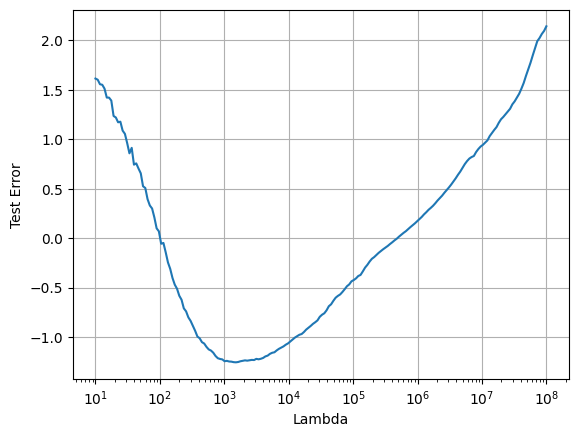

In [29]:
plt.plot(lambdas, median_result)
plt.xlabel("Lambda")
plt.ylabel("Test Error")
plt.xscale("log")
plt.grid()

In [25]:
s4_noise_loaded.save(save_path)

In [30]:
s4_noise_loaded.lambda_reg

1516.7168884709226

## Test train

In [ ]:
s4_noise_loaded.fit(torch.from_numpy(X_train).to(0).float())

Build normalization frames ... [DONE]
Fitting ... 

 23%|█████████████████████████████████████▉                                                                                                                            | 2680/11449 [14:48<48:19,  3.02it/s]

In [ ]:
save_path_final = Path("/fast/mbonse/s4/70_results/02_fine_tuning/implementation_tests/test_model_trained_fp32.pkl")

s4_noise_loaded.save(save_path_final)

In [33]:
print("hey")

## Load the model again and test predictions

In [24]:
save_path_final = Path("/fast/mbonse/s4/70_results/02_fine_tuning/implementation_tests/test_model_trained_fp32.pkl")

In [25]:
s4_noise_loaded = S4Noise.load(save_path_final)

Creating right reason mask ... [DONE]


In [26]:
s4_noise_loaded = s4_noise_loaded.to(0)

In [31]:
residual, noise_estimate = s4_noise_loaded.predict(torch.from_numpy(X_train).to(0))

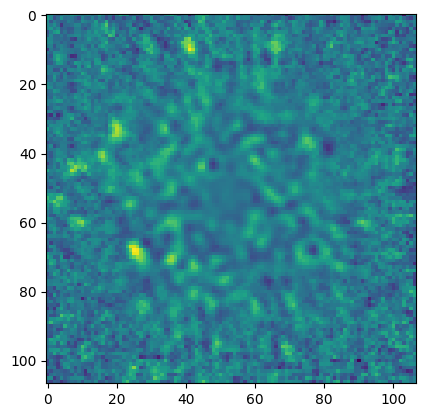

In [32]:
plt.imshow(residual[66].cpu())